In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

In [2]:
#grab correct x values and correct y
px = []
py = []
for i in range(len(x)):
    if y[i] == 0:
        px.append(x[i][1::2])
        py.append(-1)
    elif y[i] == 1:
        px.append(x[i][1::2])
        py.append(y[i])


In [3]:
def perceptron_label(x, w, b):
    sign = np.sum(w * x) + b
    if(sign < 0):
        return -1
    else:
        return 1

def perceptron_classifier(x,y):
    w = [0,0]
    b = 0
    rand_inds = np.arange(0, len(x))
    np.random.shuffle(rand_inds)
    num_errors = -1
    k = 0
    
    while num_errors != 0:
        num_errors = 0
        
        np.random.shuffle(rand_inds)
        for i in rand_inds:
            if perceptron_label(x[i], w, b) != y[i]:
                w = w + y[i]*x[i]
                b = b + y[i]
                num_errors += 1
                k += 1

    return w, b, k
            

[-1.6  7.2] 1


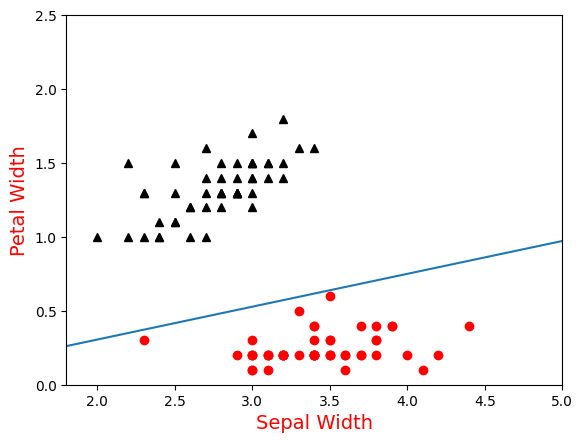

In [4]:
w,b,k = perceptron_classifier(px,py)
print(w, b)

db_in = np.linspace(-10, 10, 100)
db_out = [(-w[0] / w[1]) * db_in[i] - (b / w[1]) for i in range(len(px))]

plt.plot(db_in, db_out, label="db")

x_min, x_max = 1.8, 5
y_min, y_max = 0, 2.5
plt.plot(x[(y==0),1], x[(y==0),3], 'ro')
plt.plot(x[(y==1),1], x[(y==1),3], 'k^')
plt.xlabel('Sepal Width', fontsize=14, color='red')
plt.ylabel('Petal Width', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

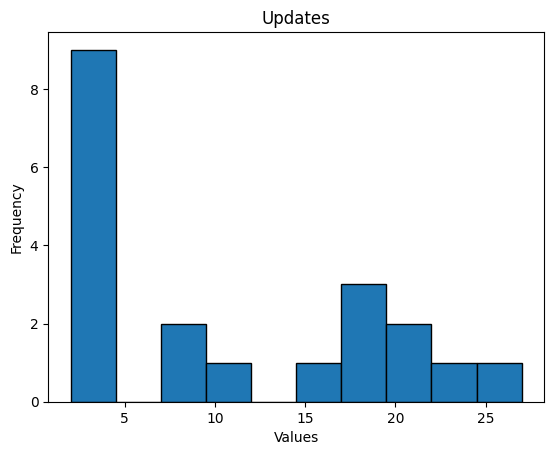

In [5]:
karr = []
for i in range(20):
    w,b,k = perceptron_classifier(px, py)
    karr.append(k)

plt.hist(karr, edgecolor='black') 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Updates')

plt.show()

In [6]:
svm_x = []
svm_y = []
for i in range(len(x)):
    if y[i] != 0:
        svm_x.append(x[i][0::2])
        svm_y.append(y[i])

svm_x = np.array(svm_x)
svm_y = np.array(svm_y)

In [7]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(svm_x,svm_y)

sv = np.zeros(100,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)

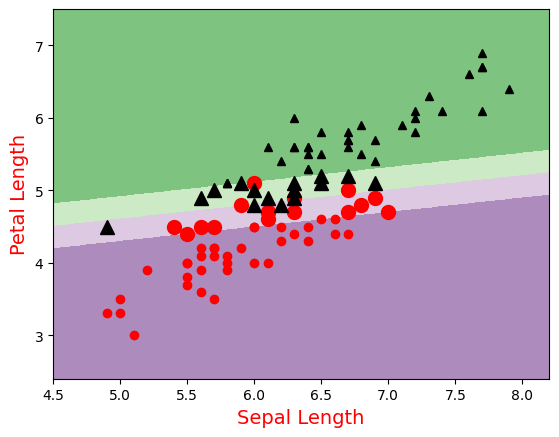

In [11]:
delta = 0.005
x_min, x_max = 4.5, 8.2
y_min, y_max = 2.4, 7.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(svm_x[(svm_y==1)*notsv,0], svm_x[(svm_y==1)*notsv,1], 'ro')
plt.plot(svm_x[(svm_y==1)*sv,0], svm_x[(svm_y==1)*sv,1], 'ro', markersize=10)
plt.plot(svm_x[(svm_y==2)*notsv,0], svm_x[(svm_y==2)*notsv,1], 'k^')
plt.plot(svm_x[(svm_y==2)*sv,0], svm_x[(svm_y==2)*sv,1], 'k^', markersize=10)
plt.xlabel('Sepal Length', fontsize=14, color='red')
plt.ylabel('Petal Length', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics


C_values = [0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 50]
results_df = pd.DataFrame(columns=['C', 'Training Error', 'Number of Support Vectors'])

for C in C_values:
    # Create and fit the SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(svm_x, svm_y)
    
    # Make predictions on the training set
    y_train_pred = svm_classifier.predict(svm_x)
    
    # Calculate training error
    training_error = 1.0 - metrics.accuracy_score(svm_y, y_train_pred)
    
    # Get the number of support vectors
    num_support_vectors = np.sum(svm_classifier.n_support_)
    
    # Append results to the DataFrame
    results_df.loc[len(results_df.index)] = {'C': C, 'Training Error': training_error, 'Number of Support Vectors': num_support_vectors}
# Display the results
print(results_df)

      C  Training Error  Number of Support Vectors
0   0.1            0.07                         56
1   0.5            0.06                         38
2   1.0            0.07                         31
3   5.0            0.06                         21
4  10.0            0.05                         18
5  15.0            0.07                         16
6  20.0            0.07                         16
7  25.0            0.07                         16
8  30.0            0.07                         15
9  50.0            0.05                         14


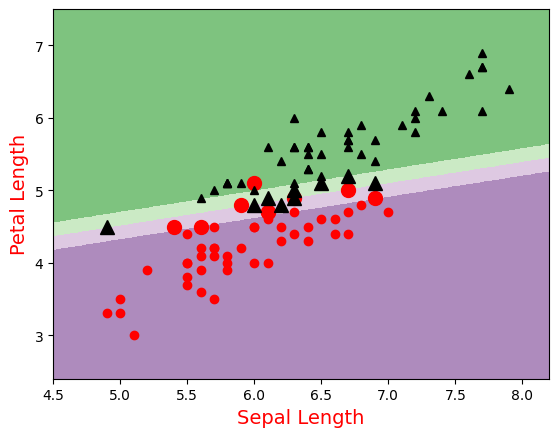

In [13]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=10)
clf.fit(svm_x,svm_y)

sv = np.zeros(100,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)



delta = 0.005
x_min, x_max = 4.5, 8.2
y_min, y_max = 2.4, 7.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(svm_x[(svm_y==1)*notsv,0], svm_x[(svm_y==1)*notsv,1], 'ro')
plt.plot(svm_x[(svm_y==1)*sv,0], svm_x[(svm_y==1)*sv,1], 'ro', markersize=10)
plt.plot(svm_x[(svm_y==2)*notsv,0], svm_x[(svm_y==2)*notsv,1], 'k^')
plt.plot(svm_x[(svm_y==2)*sv,0], svm_x[(svm_y==2)*sv,1], 'k^', markersize=10)
plt.xlabel('Sepal Length', fontsize=14, color='red')
plt.ylabel('Petal Length', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()